<a href="https://colab.research.google.com/github/mina-fayazi/BN-Doped-Biphenylene/blob/main/BNDopedBiphenylene_CNN_WithConv2DLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the Google Drive data:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install ipython-autotime -q
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
time: 249 µs (started: 2023-11-25 07:31:17 +00:00)


In [3]:
import pandas as pd

# Defining the database directory:
data_path = "/content/drive/MyDrive/BNDopedBiphData/data/BNDopedBiphenylene3.csv"
# Storing the dataset in a Pandas dataframe:
data_frame = pd.read_csv(data_path)
display(data_frame)

,Atom Arrangements,a,b,Direct Eg,Indirect Eg,Epsilon_Real (Parallel),Epsilon_Img (Parallel),Epsilon_Real (Perpendicular),Epsilon_Img (Perpendicular)
0,1.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.0 0....,7.5875,9.0995,0.000,0.0000,3.1291,0.0000,47.1022,0.0000
1,0.5 1.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.0 0....,7.5876,9.1213,0.000,0.0000,3.1063,0.0000,12.4946,0.0000
2,0.5 0.5 1.0 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.0 0....,7.5862,9.1222,0.000,0.0000,2.9222,0.0036,29.7153,0.0562
3,0.5 0.5 0.5 1.0 0.5 0.5 0.5 0.5 0.5 0.5 0.0 0....,7.5874,9.0943,0.000,0.0000,2.7866,0.0000,41.8248,0.0000
4,0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.5 0.5 0.5 0.0 0....,7.5884,9.1184,0.000,0.0000,2.7257,0.0000,26.4036,0.0000
5,0.5 0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.5 0.5 0.0 0....,7.5925,9.1151,0.000,0.0000,3.7813,0.0000,15.6735,0.0000
6,0.5 0.5 0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.5 0.0 0....,7.5962,9.0864,0.000,0.0000,14.5389,0.0000,90.6615,0.0000
7,0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0 0.5 0.5 0.0 0....,7.5930,9.1117,0.106,0.0630,4.1020,0.0000,30.5278,0.0000
8,0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0 0.5 0.0 0....,7.5888,9.1109,0.000,0.0000,4.0728,0.0000,44.2528,0.0000
9,0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 1.0 0.0 0....,7.5938,9.0797,0.083,0.0763,4.6488,0.0000,34.5004,0.0005


time: 1.01 s (started: 2023-11-25 07:31:20 +00:00)


In [4]:
import numpy as np

# Specifying the dataset size:
rows = 5
columns = 5

# Specifying x data:
x_data = []
for index, row in data_frame.iterrows():
    #print(index, '  ', row['Atom Arrangements'])
    atom_list = list(row['Atom Arrangements'].split())
    #print(atom_list)
    atom_float_list = [float(x) for x in atom_list]
    #print(atom_int_list)
    #atom_matrix = np.array(atom_float_list)
    atom_matrix = np.reshape(atom_float_list, (rows, columns))
    #print(atom_matrix)
    x_data.append(atom_matrix)
#x_data = np.stack(x_data, axis=0)
x_data = np.array(x_data)
#print(x_data)

time: 10.7 ms (started: 2023-11-25 07:31:25 +00:00)


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D

#Defining CNN model:
test_model = models.Sequential()
test_model.add(Conv2D(16, (2, 2), padding="same", activation="relu"))
test_model.add(Conv2D(32, (2, 2), padding="same", activation="relu"))
test_model.add(Conv2D(64, (2, 2), padding="same", activation="relu"))
test_model.add(MaxPooling2D(pool_size=(2, 2)))
test_model.add(Conv2D(128, (2, 2), padding="same", activation="relu"))
test_model.add(MaxPooling2D(pool_size=(2, 2)))
test_model.add(layers.Flatten())
test_model.add(layers.Dense(64, activation="relu"))
test_model.add(layers.Dense(40, activation="relu"))
test_model.add(layers.Dense(35, activation="relu"))
test_model.add(layers.Dense(1, "sigmoid"))

input_shape=(None, rows, columns, 1)
test_model.build(input_shape)

test_model.summary()

# Compiling the model:
test_model.compile(optimizer="RMSProp", loss="mean_squared_error", metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 5, 5, 16)          80        
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 32)          2080      
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 128)         32896     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                 

The calculations for 'a' values:
1/1 [==============================] - 0s 88ms/step
Predicted y:        0.4876              Predicted y without scaler:   7.5848              
Actual y:           0.5697              Actual y without scaler:      7.5875              
1/1 [==============================] - 0s 14ms/step
Predicted y:        0.5701              Predicted y without scaler:   7.5875              
Actual y:           0.5728              Actual y without scaler:      7.5876              
1/1 [==============================] - 0s 14ms/step
Predicted y:        0.6515              Predicted y without scaler:   7.5901              
Actual y:           0.5294              Actual y without scaler:      7.5862              
1/1 [==============================] - 0s 23ms/step
Predicted y:        0.6004              Predicted y without scaler:   7.5885              
Actual y:           0.5666              Actual y without scaler:      7.5874              
1/1 [==========================

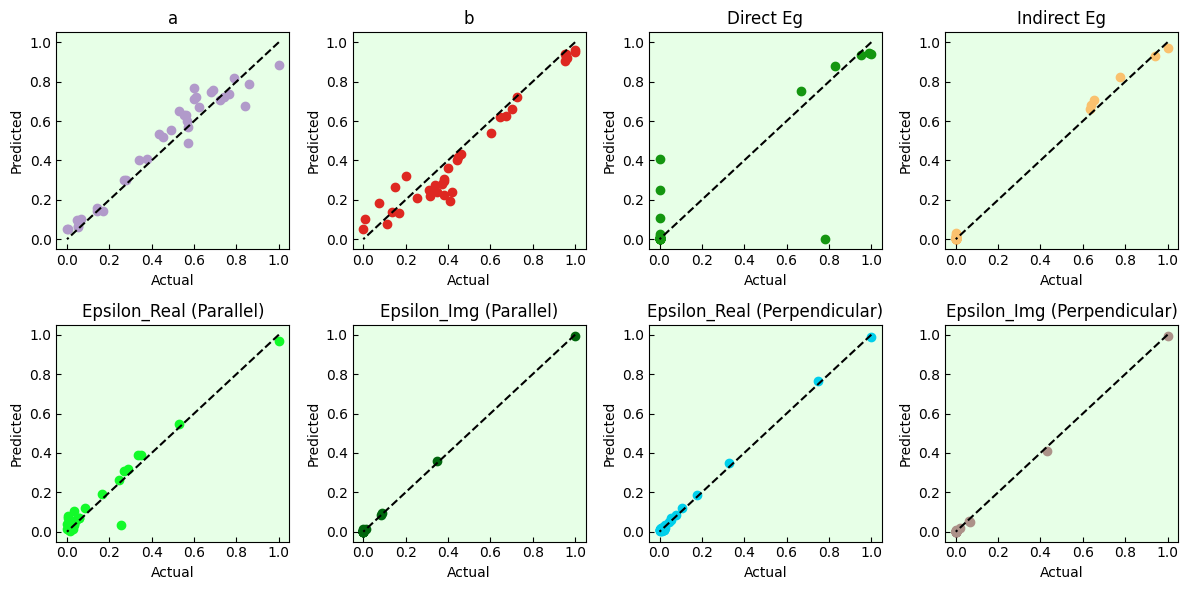

time: 3min 45s (started: 2023-11-25 07:36:32 +00:00)


In [9]:
# Importing math:
import math
# Importing MinMaxScaler from sklearn to normalize the data:
from sklearn.preprocessing import MinMaxScaler

import random
import sklearn.metrics
import matplotlib.pyplot as plt

# Creating the scaler:
y_scaler = MinMaxScaler()

# Defining variables:
batch_size = (len(data_frame) - 1) #number of training samples in one forward/backward pass
num_epoch = 20 #one epoch means one forward and one backward pass of all the training samples

###Creating an empty dataframe:
ex_df = pd.DataFrame()
###

# Creating a figure to visualize data:
fig = plt.figure(figsize = (12,6))
subplot_counter = 1
fig_dir = "/content/drive/MyDrive/BNDopedBiphData/figures"

# Getting headers of data_frame's columns:
df_headers = list(data_frame.columns)
y_headers = df_headers[1:] #slices the list

# Iterate over every column to define y_data:
for header in y_headers:
  ###Exporting into dataframe:
  act_val = []
  pre_val = []
  ###
  print("The calculations for '{}' values:".format(header))
  y_data = np.array(data_frame[header])
  #max_y_value = y_data.max()
  y_data = np.reshape(y_data, (-1, 1)) #Reshaping 1D array to 2D array
  #y_data_scaled = y_data/max_y_value
  y_data = y_scaler.fit_transform(y_data)
  #print(header, y_data)

  actual_y = []
  predicted_y = []

  # Iterate over every row to define test and train data:
  for i in range(len(data_frame)):
    # Test:
    #print("Iteration ", i, " :")
    x_test = x_data[i]
    x_test = np.reshape(x_test, (1, rows, columns)) #Reshaping to 2D array
    y_test = y_data[i]
    y_test = np.reshape(y_test, (1, -1)) #Reshaping to 2D array
    actual_y.append(y_data[i])
    #print("x test shape: ", x_test.shape)
    #print("y test shape: ", y_test.shape)
    #print("x test: ", x_test)
    #print("y test: ", y_test)
    #print("----------------------------")
    # Train:
    x_train = np.delete(x_data, i, axis=0)
    y_train = np.delete(y_data, i, axis=0)
    #print("x train shape: ", x_train.shape)
    #print("y train shape: ", y_train.shape)
    #print("x train: ", x_train)
    #print("y train: ", y_train)

    # Model Training:
    model_log = test_model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=num_epoch,
                          verbose=0,
                          validation_data=(x_test, y_test))

    # Evaluating the model:
    test_model.evaluate(x_test, y_test, verbose=0)

    # Predicting the test data:
    y_pred = test_model.predict(x_test)
    predicted_y.append(y_pred)
    #print("Predicted y: ", y_pred, "   Predicted y without scalar: ",y_scaler.inverse_transform(y_pred))
    #print("Actual y:    ", y_test, "   Actual y without scaler:    ",y_scaler.inverse_transform(y_test))
    print(f"{'Predicted y:' : <20}{str(round(float(y_pred),4)) : <20}{'Predicted y without scaler:' : <30}{str(round(float(y_scaler.inverse_transform(y_pred)),4)) : <20}")
    print(f"{'Actual y:' : <20}{str(round(float(y_test),4)) : <20}{'Actual y without scaler:' : <30}{str(round(float(y_scaler.inverse_transform(y_test)),4)) : <20}")
    #print(f"{'Predicted y:' : <20}{str(round(float(y_pred),4)) : <20}{'Predicted y without scaler:' : <30}{str(round(float(max_y_value*y_pred),4)) : <20}")
    #print(f"{'Actual y:' : <20}{str(round(float(y_test),4)) : <20}{'Actual y without scaler:' : <30}{str(round(float(max_y_value*y_test),4)) : <20}")

    ###Exporting Actual and Predicted value into a dataframe:
    act_val.append(y_scaler.inverse_transform(y_test))
    pre_val.append(y_scaler.inverse_transform(y_pred))
    ###

  ###
  col1 = str(header) + '_' + 'Actual'
  col2 = str(header) + '_' + 'Predicted'
  act_val = np.reshape(act_val, (-1))
  pre_val = np.reshape(pre_val, (-1))
  ex_df[col1] = act_val
  ex_df[col2] = pre_val
  ###

  actual_y = np.reshape(actual_y, (-1))
  predicted_y = np.reshape(predicted_y, (-1))
  #print("Actual y values: ", actual_y)
  #print("Predicted y values: ", predicted_y)

  MSE = 0
  MSE_sk = 0
  RMSE = 0
  RMSE_sk = 0
  NRMSE = 0
  ss_t = 0 #total sum of squares
  ss_r = 0 #total sum of square of residuals

  print('__________________________________________________')
  # Mean Squared Error:
  MSE = (np.square(np.subtract(actual_y, predicted_y))).mean()
  print("Mean Squared Error = ", MSE)
  MSE_sk = sklearn.metrics.mean_squared_error(actual_y, predicted_y)
  print("MSE using sklearn = ", MSE_sk)
  # Root Mean Square Error:
  RMSE = math.sqrt(MSE)
  RMSE_sk = math.sqrt(MSE_sk)
  print("Root Mean Square Error = ", RMSE)
  print("RMSE using sklearn = ", RMSE_sk)
  # Normalized Root Mean Square Error:
  #actual_y_min = actual_y.min()
  #actual_y_max = actual_y.max()
  #actual_y_diff = actual_y_max - actual_y_min
  actual_y_mean = actual_y.mean()
  if actual_y_mean != 0:
    NRMSE = RMSE/actual_y_mean
    print("Normalized Root Mean Square Error = ", NRMSE)

  # R-squared:
  y_mean = actual_y.mean()
  #print(y_mean)

  for i in range(len(data_frame)):
    ss_t += (actual_y[i] - y_mean) ** 2
    ss_r += (actual_y[i] - predicted_y[i]) ** 2

  R2 = 1 - (ss_r/ss_t)
  print("R-Squared = ", R2)
  print("R-squared using sklearn = ", sklearn.metrics.r2_score(actual_y, predicted_y))
  print('-----------------------------------------------------------------------------')

  rgb_value=""
  for i in range(6):
    rgb_value += random.choice("0123456789ABCDEF")

  random_color = "#"+rgb_value

  plt.rcParams['axes.facecolor'] ="#e7ffe7"
  plt.subplot(2, 4, subplot_counter)
  plt.title(header, fontsize=12)
  plt.scatter(actual_y, predicted_y, c=random_color)
  p1 = max(max(predicted_y), max(actual_y))
  p2 = min(min(predicted_y), min(actual_y))
  plt.plot([p1, p2], [p1, p2], 'k--')
  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  plt.xlabel('Actual', fontsize=10)
  plt.ylabel('Predicted', fontsize=10)
  plt.tick_params(axis='x', direction='in')
  plt.tick_params(axis='y', direction='in')
  subplot_counter = subplot_counter+1

plt.tight_layout()
plt.savefig(f"{fig_dir}/testmodelresults2.png", dpi=800)
plt.show()

###Export the DataFrame to an Excel file
ex_df.to_excel(f"{fig_dir}/TestModelOutput.xlsx", index=False)
###

In [10]:
# Installing KerasTuner:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.7 MB/s eta 0:00:00
time: 5.82 s (started: 2023-11-25 07:43:31 +00:00)


In [32]:
# Hyperparameter tuning using RandomSearch:

import keras_tuner
from keras.optimizers import Adam, SGD, RMSprop, Nadam

# Defining the search space for Hyperparameter tuning:
def build_model(hp):
  model = models.Sequential()
  model.add(Conv2D(16, (2, 2), padding="same", activation="relu"))
  model.add(Conv2D(32, (2, 2), padding="same", activation="relu"))
  model.add(Conv2D(64, (2, 2), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (2, 2), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  # Tune the number of hidden layers:
  for i in range(hp.Int("num_layers", 1, 10)):
    model.add(
        layers.Dense(
            # Tune number of units separately.
            units=hp.Int(f"units_{i}", min_value=35, max_value=525, step=35),
            activation=hp.Choice("activation", ["relu", "selu", "sigmoid", "tanh", "softmax"])))
  if hp.Boolean("dropout"):
    model.add(layers.Dropout(rate=0.25))
  # Output layer:
  model.add(layers.Dense(1, "sigmoid"))
  # Optimizer:
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  optimizers_dict = {
      "Adam":    Adam(learning_rate=learning_rate),
      "SGD":     SGD(learning_rate=learning_rate),
      "RMSprop": RMSprop(learning_rate=learning_rate),
      "Nadam":   Nadam(learning_rate=learning_rate)
      }
  optimizer=hp.Choice("optimizer", values=["Adam", "SGD", "RMSprop", "Nadam"])
  model.build(input_shape)
  model.compile(
      optimizer=optimizers_dict[optimizer],
      loss="mean_squared_error",
      metrics=["accuracy"]
      )

  return model

# Testing if the model builds successfully:
build_model(keras_tuner.HyperParameters())

time: 130 ms (started: 2023-11-25 08:07:18 +00:00)


In [33]:
# Initializing the tuner to start the search:
tuner = keras_tuner.RandomSearch(
  hypermodel=build_model,
  objective="val_loss",
  max_trials=20,
  executions_per_trial=15,
  overwrite=True,
  directory="/content/drive/MyDrive/BNDopedBiphData/best_model",
  project_name="RSBestModel"
)

# Print a summary of the search space:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 35, 'max_value': 525, 'step': 35, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'sigmoid', 'tanh', 'softmax'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'SGD', 'RMSprop', 'Nadam'], 'ordered': False}
time: 78.8 ms (started: 2023-11-25 08:07:21 +00:00)


In [34]:
# Defining callbacks for tuning the number of epochs, and saving the Keras model in a checkpoint file:
my_callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  #mode="max",
                                  #baseline=0.9,
                                  patience=20, # Will stop training if the "val_loss" hasn't improved in 20 epochs
                                  start_from_epoch=100
                                  ),
    keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/BNDopedBiphData/checkpoint/model.{epoch:02d}-{val_loss:.2f}.h5",
                                    save_weights_only=True,
                                    monitor="val_loss",
                                    #mode="max",
                                    save_best_only=True
                                    )
    ]

time: 826 µs (started: 2023-11-25 08:07:24 +00:00)


In [35]:
# Preparing the dataset:

# Pick 1 random index for choosing test data:
random_list = random.sample(range(0, (len(data_frame)-1)), 1)

# Splitting X and Y data to test and train:

y_data = np.array(data_frame["a"])
y_data = np.reshape(y_data, (-1, 1)) #Reshaping 1D array to 2D array
y_data = y_scaler.fit_transform(y_data)

x_test = []
y_test = []

for i in random_list:
  x_test = np.append(x_test, x_data[i])
  y_test = np.append(y_test, y_data[i])

x_test = np.reshape(x_test, (1, rows, columns)) #Reshaping to 2D array
y_test = np.reshape(y_test, (1, -1)) #Reshaping to 2D array
print("Indexes :", random_list, '\n', x_test, '\n', y_test)
x_train = np.delete(x_data, random_list, axis=0)
y_train = np.delete(y_data, random_list, axis=0)

Indexes : [11] 
 [[[0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [0.  0.5 1.  0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]
  [0.5 0.5 0.5 0.5 0.5]]] 
 [[0.6006192]]
time: 9.56 ms (started: 2023-11-25 08:07:26 +00:00)


In [36]:
# Start the search for the best hyperparameter configuration:

tuner.search(x_train, y_train, epochs=1000, callbacks=my_callbacks, validation_data=(x_test, y_test))

Trial 20 Complete [00h 05m 28s]
val_loss: 0.006621396236325457

Best val_loss So Far: 1.7933514527612714e-06
Total elapsed time: 01h 28m 13s
time: 1h 28min 12s (started: 2023-11-25 08:07:56 +00:00)


In [37]:
# Print a summary of the 5 best search results:

tuner.results_summary(5)

Results summary
Results in /content/drive/MyDrive/BNDopedBiphData/best_model/RSBestModel
Showing 5 best trials
Objective(name="val_loss", direction="min")

Trial 01 summary
Hyperparameters:
num_layers: 1
units_0: 210
activation: tanh
dropout: False
learning_rate: 0.000575732702957742
optimizer: RMSprop
units_1: 525
units_2: 420
units_3: 525
units_4: 490
units_5: 385
units_6: 490
units_7: 175
Score: 1.7933514527612714e-06

Trial 18 summary
Hyperparameters:
num_layers: 8
units_0: 420
activation: selu
dropout: False
learning_rate: 0.0004946335973320493
optimizer: Adam
units_1: 35
units_2: 525
units_3: 210
units_4: 315
units_5: 105
units_6: 245
units_7: 105
Score: 3.1653383636864875e-06

Trial 09 summary
Hyperparameters:
num_layers: 1
units_0: 315
activation: tanh
dropout: False
learning_rate: 0.0009142311834577992
optimizer: RMSprop
units_1: 315
units_2: 420
units_3: 315
units_4: 70
units_5: 245
units_6: 315
units_7: 385
Score: 3.657217057906337e-06

Trial 17 summary
Hyperparameters:
num_

In [38]:
# Get the top 2 models:

models = tuner.get_best_models(num_models=2)
best_model = models[0]
second_best_model = models[1]
# Build the best models:
best_model.build(input_shape)
best_model.summary()
second_best_model.build(input_shape)
second_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 16)          80        
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          8256      
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 64)          0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 128)         32896     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)         0         
 g2D)                                                   

The calculations for 'a' values:
Number of epochs:  220 

1/1 [==============================] - 0s 72ms/step
Predicted y:        0.5667              Predicted y without scaler:   7.5874              
Actual y:           0.5697              Actual y without scaler:      7.5875              
Number of epochs:  154 

1/1 [==============================] - 0s 16ms/step
Predicted y:        0.5571              Predicted y without scaler:   7.5871              
Actual y:           0.5728              Actual y without scaler:      7.5876              
Number of epochs:  152 

1/1 [==============================] - 0s 21ms/step
Predicted y:        0.5249              Predicted y without scaler:   7.5861              
Actual y:           0.5294              Actual y without scaler:      7.5862              
Number of epochs:  220 

1/1 [==============================] - 0s 22ms/step
Predicted y:        0.5472              Predicted y without scaler:   7.5868              
Actual y:           0.

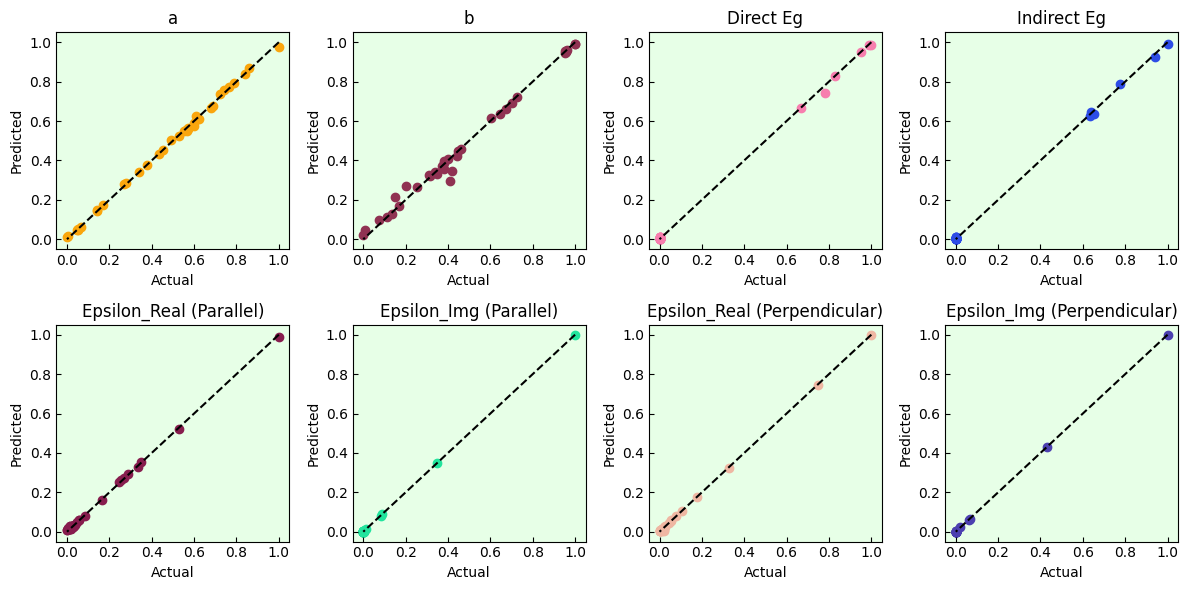

time: 31min 21s (started: 2023-11-25 09:44:07 +00:00)


In [39]:
# Retrain dataset with the best model:

# Creating a figure to visualize data:
fig2 = plt.figure(figsize = (12,6))
subplot_counter = 1

###Creating an empty dataframe:
ex_df2 = pd.DataFrame()
###

# Iterate over every column to define y_data:
for header in y_headers:
  ###Exporting into dataframe:
  act_val = []
  pre_val = []
  ###
  print("The calculations for '{}' values:".format(header))
  y_data = np.array(data_frame[header])
  #max_y_value = y_data.max()
  y_data = np.reshape(y_data, (-1, 1)) #Reshaping 1D array to 2D array
  #y_data_scaled = y_data/max_y_value
  y_data = y_scaler.fit_transform(y_data)
  #print(header, y_data)

  actual_y = []
  predicted_y = []

  # Iterate over every row to define test and train data:
  for i in range(len(data_frame)):
    # Test:
    #print("Iteration ", i, " :")
    x_test = x_data[i]
    x_test = np.reshape(x_test, (1, rows, columns)) #Reshaping to 2D array
    y_test = y_data[i]
    y_test = np.reshape(y_test, (1, -1)) #Reshaping to 2D array
    actual_y.append(y_data[i])
    #print("x test shape: ", x_test.shape)
    #print("y test shape: ", y_test.shape)
    #print("x test: ", x_test)
    #print("y test: ", y_test)
    #print("----------------------------")
    # Train:
    x_train = np.delete(x_data, i, axis=0)
    y_train = np.delete(y_data, i, axis=0)
    #print("x train shape: ", x_train.shape)
    #print("y train shape: ", y_train.shape)
    #print("x train: ", x_train)
    #print("y train: ", y_train)

    # Model Training:
    history = best_model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=1000,
                             callbacks=my_callbacks,
                             verbose=0,
                             validation_data=(x_test, y_test))

    print("Number of epochs: ", len(history.history['val_accuracy']), '\n')

    # Evaluating the model:
    best_model.evaluate(x_test, y_test, verbose=0)

    # Predicting the test data:
    y_pred = best_model.predict(x_test)
    predicted_y.append(y_pred)
    #print("Predicted y: ", y_pred, "   Predicted y without scalar: ",y_scaler.inverse_transform(y_pred))
    #print("Actual y:    ", y_test, "   Actual y without scaler:    ",y_scaler.inverse_transform(y_test))
    print(f"{'Predicted y:' : <20}{str(round(float(y_pred),4)) : <20}{'Predicted y without scaler:' : <30}{str(round(float(y_scaler.inverse_transform(y_pred)),4)) : <20}")
    print(f"{'Actual y:' : <20}{str(round(float(y_test),4)) : <20}{'Actual y without scaler:' : <30}{str(round(float(y_scaler.inverse_transform(y_test)),4)) : <20}")
    #print(f"{'Predicted y:' : <20}{str(round(float(y_pred),4)) : <20}{'Predicted y without scaler:' : <30}{str(round(float(max_y_value*y_pred),4)) : <20}")
    #print(f"{'Actual y:' : <20}{str(round(float(y_test),4)) : <20}{'Actual y without scaler:' : <30}{str(round(float(max_y_value*y_test),4)) : <20}")

    ###Exporting Actual and Predicted value into a dataframe:
    act_val.append(y_scaler.inverse_transform(y_test))
    pre_val.append(y_scaler.inverse_transform(y_pred))
    ###

  ###
  col1 = str(header) + '_' + 'Actual'
  col2 = str(header) + '_' + 'Predicted'
  act_val = np.reshape(act_val, (-1))
  pre_val = np.reshape(pre_val, (-1))
  ex_df2[col1] = act_val
  ex_df2[col2] = pre_val
  ###

  actual_y = np.reshape(actual_y, (-1))
  predicted_y = np.reshape(predicted_y, (-1))
  #print("Actual y values: ", actual_y)
  #print("Predicted y values: ", predicted_y)

  MSE = 0
  RMSE = 0
  NRMSE = 0
  ss_t = 0 #total sum of squares
  ss_r = 0 #total sum of square of residuals

  print('__________________________________________________')
  # Mean Squared Error:
  MSE = (np.square(np.subtract(actual_y, predicted_y))).mean()
  print("Mean Squared Error = ", MSE)
  # Root Mean Square Error:
  RMSE = math.sqrt(MSE)
  print("Root Mean Square Error = ", RMSE)
  # Normalized Root Mean Square Error:
  #actual_y_min = actual_y.min()
  #actual_y_max = actual_y.max()
  #actual_y_diff = actual_y_max - actual_y_min
  actual_y_mean = actual_y.mean()
  if actual_y_mean != 0:
    NRMSE = RMSE/actual_y_mean
    print("Normalized Root Mean Square Error = ", NRMSE)

  # R-squared:
  y_mean = actual_y.mean()
  #print(y_mean)

  for i in range(len(data_frame)):
    ss_t += (actual_y[i] - y_mean) ** 2
    ss_r += (actual_y[i] - predicted_y[i]) ** 2

  R2 = 1 - (ss_r/ss_t)
  print("R-Squared = ", R2)
  print('-----------------------------------------------------------------------------')

  rgb_value=""
  for i in range(6):
    rgb_value += random.choice("0123456789ABCDEF")

  random_color = "#"+rgb_value

  plt.rcParams['axes.facecolor'] ="#e7ffe7"
  plt.subplot(2, 4, subplot_counter)
  plt.title(header, fontsize=12)
  plt.scatter(actual_y, predicted_y, c=random_color)
  p1 = max(max(predicted_y), max(actual_y))
  p2 = min(min(predicted_y), min(actual_y))
  plt.plot([p1, p2], [p1, p2], 'k--')
  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  plt.xlabel('Actual', fontsize=10)
  plt.ylabel('Predicted', fontsize=10)
  plt.tick_params(axis='x', direction='in')
  plt.tick_params(axis='y', direction='in')
  subplot_counter = subplot_counter+1

plt.tight_layout()
plt.savefig(f"{fig_dir}/bestmodelresults2.png", dpi=800)
plt.show()

###Export the DataFrame to an Excel file
ex_df2.to_excel(f"{fig_dir}/BestModelOutput.xlsx", index=False)
###